In [143]:
from __future__ import absolute_import
from __future__ import print_function
# For manipulating data
import pandas as pd
import numpy as np
from keras.utils import np_utils # For y values
# For plotting
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
# For Keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout

# csvname = 'http://cvl.inf.tu-dresden.de/HTML/teaching/courses/PML2/ws18/Data_3D_2classes.csv'
csvname = './Data_3D_2classes.csv'

print('Reading "' + csvname + '":')
dat = np.loadtxt(csvname, delimiter=';')

# print(dat)

df = pd.DataFrame(dat)
print(df.describe())

Reading "./Data_3D_2classes.csv":
                0           1           2           3
count  200.000000  200.000000  200.000000  200.000000
mean     1.873878    2.045180    1.005943    0.120000
std      1.928166    1.480568    1.411082    0.995265
min     -2.453640   -1.614314   -3.625322   -1.000000
25%      0.452132    1.048504    0.120012   -1.000000
50%      1.777877    1.941266    1.040024    1.000000
75%      3.344362    3.011775    1.946041    1.000000
max      7.270782    6.554859    4.624507    1.000000


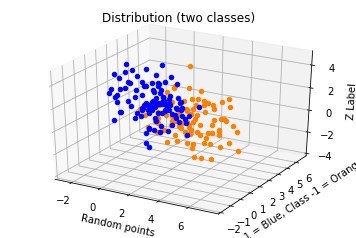

In [140]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, d in enumerate(dat):
    if d[3] > 0:
        ax.scatter(d[0], d[1], d[2], color='#0000FF', marker='o')
    else:
        ax.scatter(d[0], d[1], d[2], color='#FF8000', marker='o')
                   
plt.title('Distribution (two classes)')
ax.set_xlabel('Random points')
ax.set_ylabel('Class 1 = Blue, Class -1 = Orange')
ax.set_zlabel('Z Label')
plt.show()

In [175]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(df.iloc[:, :-1].values, df.iloc[:, -1:].values, test_size=0.5)

# Split X and y
#X = df.iloc[50:, :-1].values
#y = df.iloc[50:, -1:].values

# Split test set
#X_test = df.iloc[:50, :-1].values
#y_test = df.iloc[:50, -1:].values

# Get dimensions of input and output
dimof_input = X.shape[1]
dimof_output = 1

# Convert classes to 0 and 1
y[y<0] = 0
y_test[y_test<0] = 0

In [176]:
# Set constants
batch_size = 1
dimof_middle = 20
dropout = 0.25
countof_epoch = 100
verbose = 0
runs = 10
print('batch_size: ', batch_size)
print('dimof_middle: ', dimof_middle)
print('dropout: ', dropout)
print('countof_epoch: ', countof_epoch)
print('verbose: ', verbose)
print()

model_stats = pd.DataFrame(np.zeros((runs,2)), columns=['Loss', 'Accuracy'])

for run_i in range(runs):
    # Set model
    model = Sequential()
    model.add(Dense(dimof_middle, input_dim=dimof_input, kernel_initializer='uniform', activation='relu'))
    #model.add(Dense(dimof_middle, input_dim=dimof_input, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(dimof_middle, kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(dimof_output, kernel_initializer='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

    # Train
    model.fit(
        X, y,
        validation_split=0.2,
        batch_size=batch_size, nb_epoch=countof_epoch, verbose=verbose)

    # Evaluate                        
    loss, accuracy = model.evaluate(X_test, y_test, verbose=verbose)
    model_stats.at[run_i,'Loss'] = loss
    model_stats.at[run_i,'Accuracy'] = accuracy

    # Predict
    #prediction = np.append(np.append(X_test,y_test,1),model.predict_classes(X_test, verbose=verbose),1)
    #correct = prediction[(np.equal(prediction[:, 3], prediction[:, 4]) == True)]
    #print(len(correct))
print(model_stats)
print()
print(model_stats.describe())

batch_size:  1
dimof_middle:  20
dropout:  0.25
countof_epoch:  100
verbose:  0

       Loss  Accuracy
0  0.084117      0.97
1  0.091858      0.98
2  0.098946      0.97
3  0.078976      0.97
4  0.084440      0.96
5  0.082062      0.97
6  0.090693      0.98
7  0.105531      0.95
8  0.078652      0.98
9  0.081065      0.97

            Loss   Accuracy
count  10.000000  10.000000
mean    0.087634   0.970000
std     0.008993   0.009428
min     0.078652   0.950000
25%     0.081314   0.970000
50%     0.084278   0.970000
75%     0.091567   0.977500
max     0.105531   0.980000
